# Análise de dados de crédito

<center><strong><a href="https://linkedin.com/in/GABonagio">Gabriel Pires Bonagio</a></strong></center>

<center>17 de julho de 2022</center>

Atividade realizada para o módulo final de Python do [curso de desenvolvimento backend com Python](https://ebaconline.com.br/back-end-python?utm_source=google&utm_medium=cpc&utm_campaign=course_41_backend-python_google_search_all_conversions_all&utm_content=c_12698714855|adg_117855695462|ad_512866175203|ph_kwd-414822100499|key_back%20end%20python|dev_c|pst_|rgnid_9101186|placement_&gclid=CjwKCAjw5s6WBhA4EiwACGncZeZ_a71yceq-z28UQiDWv7eZiY0cfx4DE7pa1hgcK7sUyMaSPWdRdBoCQ6wQAvD_BwE) na [EBAC](https://ebaconline.com.br/about-us), sob orientação do professor [André Perez](https://www.linkedin.com/in/andremarcosperez/).

# Introdução

Queremos avaliar uma base de dados de análise de crédito que mostra clientes **adimplentes** e **inadimplentes**.

Para isso, vamos começar importando os pacotes necessários. Usamos pandas para gerar o dataframe, seaborn e mathplotlib para visualização de dados.

In [37]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Análise, limpeza e tratamento

Geramos a base de dados a partir de um arquivo CSV. Os valores faltantes são tratados como `na`.

In [38]:
dataset_url = 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv'

df = pd.read_csv(
  dataset_url,
  na_values='na'
)

df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [39]:
print(f'Linhas: {df.shape[0]}\nColunas: {df.shape[1]}')

Linhas: 10127
Colunas: 16


Vamos ver quais são os tipos de ddados de cada coluna.

In [40]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

As colunas "id", "limite_credito" e "valor_transacoes_12m" tem tipos errados, então vamos converter os dados.
* id: int -> string
* limite_credito: object -> float
* valor_transacoes_12m: object -> float

In [41]:
for col in 'limite_credito', 'valor_transacoes_12m':
  df[col] = df[col].apply(
    lambda v: float(v.replace('.', '').replace(',', '.'))
  )

df['id'] = df['id'].apply(lambda v: str(v))

df.dtypes

id                          object
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

## Estatísticas

Agora podemos visualizar estatísticas do nosso dataset.

### Dados numéricos

In [42]:
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### Dados categóricos

In [43]:
df.select_dtypes(object).drop('id', axis=1).describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


## Dados faltantes

Há alguns dados faltantes nas colunas "escolaridade", "estado_civil" e "salario_anual". Vamos avaliar se podemos remover esses dados sem desbalancear nosso dataset.

Primeiro vamos observar a distribuição dos clientes adimplentes e  inadimplentes, baseado na nossa variável de interesse (default). Vamos fazer o mesmo para o dataset original e para o dataset limpo.

### Clientes adimplentes

In [44]:
non_defaulters = df[df['default'] == 0]
non_defaulters

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,3313.03,1171.56,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,714109308,0,46,M,5,graduacao,solteiro,$80K - $120K,blue,36,1,3,2,13187.97,15354.24,112
10117,712503408,0,57,M,2,mestrado,casado,$80K - $120K,blue,40,6,4,3,17925.33,17498.70,111
10120,710841183,0,54,M,1,ensino medio,solteiro,$60K - $80K,blue,34,5,0,2,13940.62,15577.67,114
10121,713899383,0,56,F,1,mestrado,solteiro,menos que $40K,blue,50,4,4,1,3688.95,14596.49,120


In [45]:
clean_non_defaulters = non_defaulters.dropna()
clean_non_defaulters

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,4010.69,1088.07,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,714109308,0,46,M,5,graduacao,solteiro,$80K - $120K,blue,36,1,3,2,13187.97,15354.24,112
10117,712503408,0,57,M,2,mestrado,casado,$80K - $120K,blue,40,6,4,3,17925.33,17498.70,111
10120,710841183,0,54,M,1,ensino medio,solteiro,$60K - $80K,blue,34,5,0,2,13940.62,15577.67,114
10121,713899383,0,56,F,1,mestrado,solteiro,menos que $40K,blue,50,4,4,1,3688.95,14596.49,120


### Clientes Inadimplentes

In [46]:
defaulters = df[df['default'] == 1]
defaulters

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
21,708508758,1,62,F,0,mestrado,casado,menos que $40K,blue,49,2,3,3,1438.73,692.25,16
39,708300483,1,66,F,0,doutorado,casado,NaN,blue,56,5,3,4,7882.47,704.78,16
51,779471883,1,54,F,1,mestrado,casado,menos que $40K,blue,40,2,1,3,1438.08,705.59,19
54,714374133,1,56,M,2,mestrado,casado,$120K +,blue,36,1,3,3,15769.34,602.60,15
61,712030833,1,48,M,2,mestrado,casado,$60K - $80K,silver,35,2,4,4,34516.60,691.10,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,716893683,1,55,F,3,sem educacao formal,solteiro,NaN,blue,47,4,3,3,14657.85,6009.18,53
10123,710638233,1,41,M,2,NaN,divorciado,$40K - $60K,blue,25,4,3,2,4277.04,8764.88,69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,5409.16,10291.78,60
10125,717406983,1,30,M,2,mestrado,NaN,$40K - $60K,blue,36,4,3,3,5281.84,8395.62,62


In [47]:
clean_defaulters = defaulters.dropna()
clean_defaulters

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
21,708508758,1,62,F,0,mestrado,casado,menos que $40K,blue,49,2,3,3,1438.73,692.25,16
51,779471883,1,54,F,1,mestrado,casado,menos que $40K,blue,40,2,1,3,1438.08,705.59,19
54,714374133,1,56,M,2,mestrado,casado,$120K +,blue,36,1,3,3,15769.34,602.60,15
61,712030833,1,48,M,2,mestrado,casado,$60K - $80K,silver,35,2,4,4,34516.60,691.10,15
127,720201033,1,53,M,2,mestrado,casado,$80K - $120K,blue,41,3,2,3,11669.07,720.82,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10108,714471183,1,47,M,4,mestrado,divorciado,$80K - $120K,blue,39,4,4,3,17504.75,10468.03,66
10112,708564858,1,33,M,2,graduacao,casado,$120K +,gold,20,2,4,1,34516.84,9338.74,73
10113,713733633,1,27,M,0,ensino medio,divorciado,$60K - $80K,blue,36,2,2,3,13303.99,10219.66,85
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,5409.16,10291.78,60


### Comparação entre dados limpos e os originais

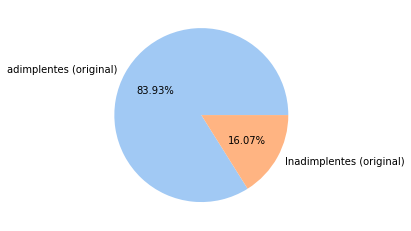

In [48]:
total = df.shape[0]
non_defaulters_total = df[df['default'] == 0].shape[0]
defaulters_total = df[df['default'] == 1].shape[0]
non_defaulters_percent = non_defaulters_total * 100 / total
defaulters_percent = defaulters_total * 100 / total

colors = sns.color_palette('pastel')[:2]
original_data = [non_defaulters_percent, defaulters_percent]
original_labels = ['adimplentes (original)', 'Inadimplentes (original)']

plt.pie(original_data, labels=original_labels, colors=colors, autopct='%.2f%%')
plt.show()

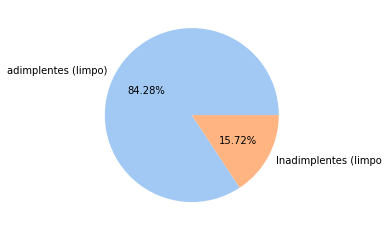

In [49]:
clean_total = df.dropna().shape[0]
clean_non_defaulters_total = clean_non_defaulters.shape[0]
clean_defaulters_total = clean_defaulters.shape[0]
clean_non_defaulters_percent = round(clean_non_defaulters_total * 100 / clean_total, 2)
clean_defaulters_percent = round(clean_defaulters_total * 100 / clean_total, 2)

colors = sns.color_palette('pastel')[:2]

clean_data = [clean_non_defaulters_percent, clean_defaulters_percent]
clean_labels = ['adimplentes (limpo)', 'Inadimplentes (limpo']

plt.pie(clean_data, labels=clean_labels, colors=colors, autopct='%.2f%%')
plt.show()

In [50]:
columns = ['Dados', 'Total', 'Total adimplentes','Porcentagem adimplentes',  'Total Inadimplentes', 'Porcentagem Inadimplentes']
data = [
  ['Original', total, non_defaulters_total, non_defaulters_percent, defaulters_total, defaulters_percent],
  ['Limpo', clean_total, clean_non_defaulters_total, clean_non_defaulters_percent, clean_defaulters_total, clean_defaulters_percent]
]

pd.DataFrame(data=data, columns=columns)

,Dados,Total,Total adimplentes,Porcentagem adimplentes,Total Inadimplentes,Porcentagem Inadimplentes
0,Original,10127,8500,83.934038,1627,16.065962
1,Limpo,7081,5968,84.280000,1113,15.720000


Como evidenciado pelos resultados das células acima, o balanço do nosso conjunto de dados se mantém quase o mesmo quando limpamos as entradas com dados faltantes. Então podemos assumir o risco de ignorar essas entradas e seguir com a exploração dos nossos dados.

In [51]:
df = df.dropna()

# Visualização de dados

Vamos comparar as variáveis explicativas entre nossa base de dados completa e as bases contendo apenas adimplentes ou inadimplentes para tentar encontrar possíveis correlações.

## Variáveis categóricas

Vamos comparar todas as variáveis explicativas categóricas exceto o sexo. Também vamos excluir a coluna "id", que não é útil para nossa análise.

In [52]:
categoricals = df.select_dtypes(object).drop(['id', 'sexo'], axis=1).columns.values

c_count = []

for col in categoricals:
  c_count.append(df[col].describe()['unique'])

pd.DataFrame([c_count], columns=categoricals)

,escolaridade,estado_civil,salario_anual,tipo_cartao
0,5,3,5,4


Vamos criar uma função que gera gráficos de barras para comparar as frequências absolutas dos dados para todos os clientes, clientes adimplentes e clientes inadimplentes.

In [53]:
def plot_categoricals(column, titles):
  axis = 0
  max_y = 0
  max = df[column].describe()['freq'] * 1.1

  figure, all_axes = plt.subplots(1, 3,
    figsize=(20, 5), sharex=True
  )

  for dataframe in df, non_defaulters, defaulters:
    df_to_plot = dataframe[column].value_counts().to_frame()
    df_to_plot.rename(
      columns={column: 'absolute_freq'},
      inplace=True
    )
    df_to_plot[column] = df_to_plot.index
    df_to_plot.sort_values(by=column, inplace=True)

    fig = sns.barplot(
      x=df_to_plot[column],
      y=df_to_plot['absolute_freq'],
      ax=all_axes[axis]
    )

    fig.set(
      title=titles[axis],
      xlabel=column,
      ylabel='Frequência Absoluta'
    )
    fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

    min_y, max_y_fig = fig.get_ylim()
    max_y = max_y_fig if max_y_fig > max_y else max_y
    fig.set_ylim(min_y, max_y)

    axis += 1

  figure.show()

### Escolaridade

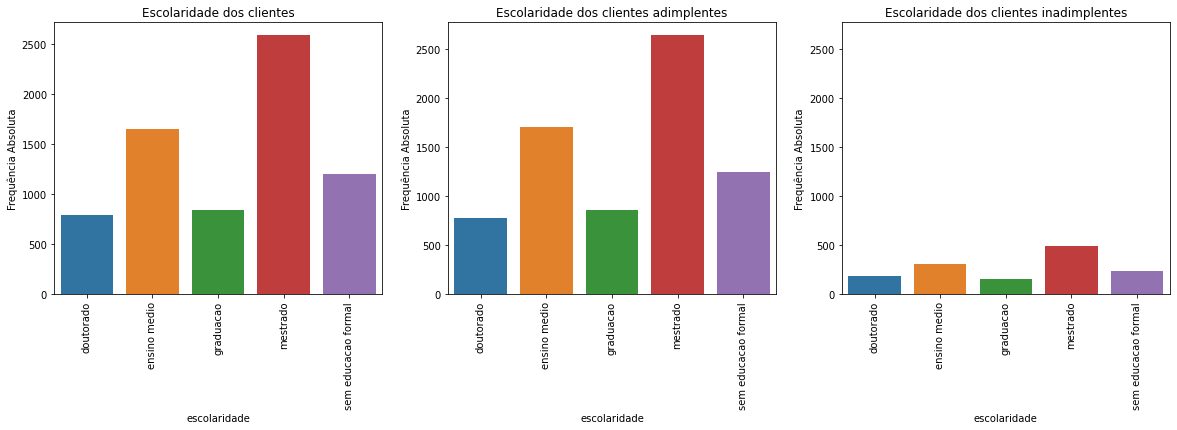

In [54]:
column = categoricals[0]  # Escolaridade
titles = ['Escolaridade dos clientes', 'Escolaridade dos clientes adimplentes', 'Escolaridade dos clientes inadimplentes']

plot_categoricals(column=column, titles=titles)

### Estado Civil

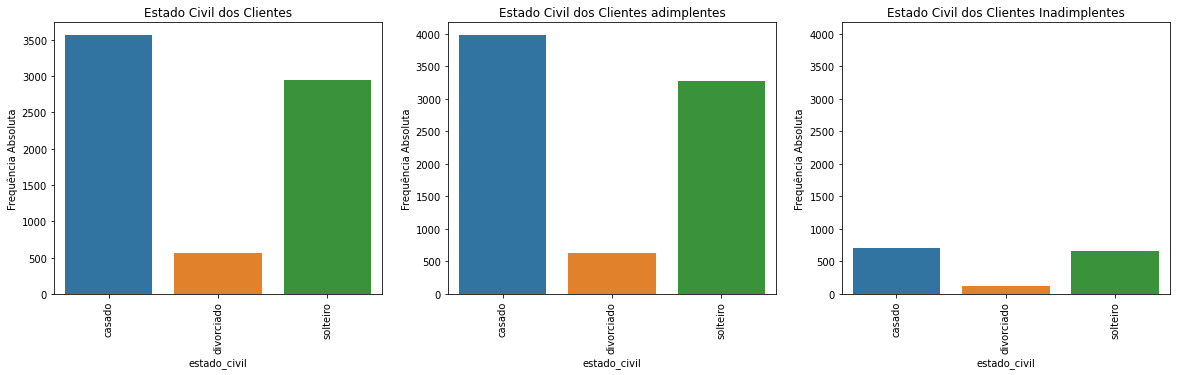

In [55]:
column = categoricals[1]  # Estado civil
titles = ["Estado Civil dos Clientes", "Estado Civil dos Clientes adimplentes", "Estado Civil dos Clientes Inadimplentes"]

plot_categoricals(column=column, titles=titles)

### Salário Mensal

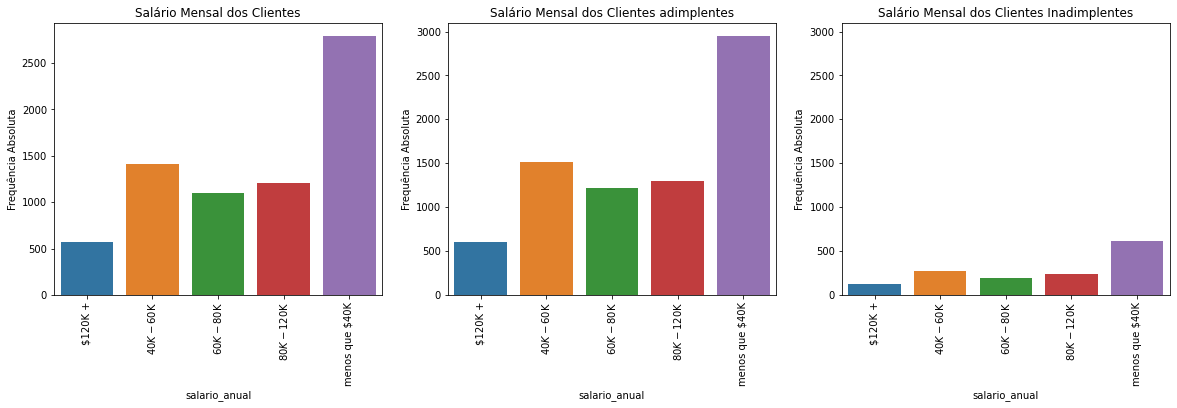

In [56]:
column = categoricals[2]  # Salário mensal
titles = ["Salário Mensal dos Clientes", "Salário Mensal dos Clientes adimplentes", "Salário Mensal dos Clientes Inadimplentes"]

plot_categoricals(column=column, titles=titles)

### Tipo de Cartão

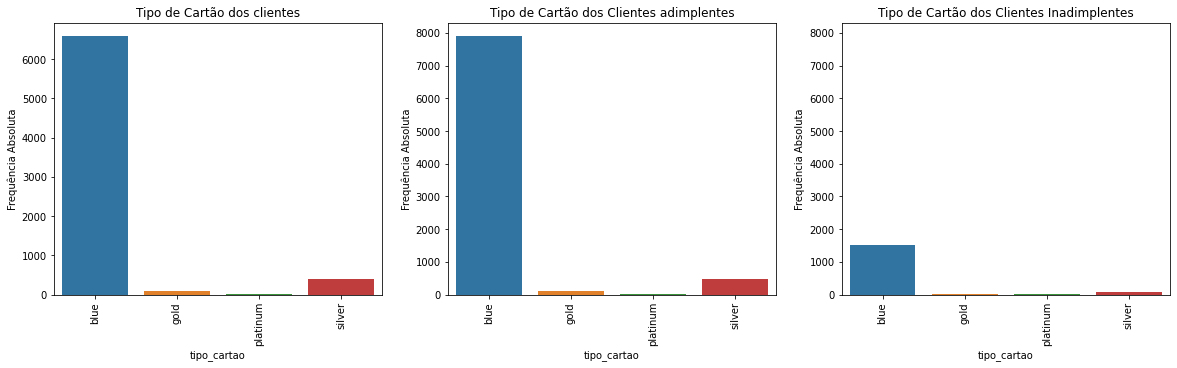

In [57]:
column = categoricals[3]  # Tipo de cartão
titles = ["Tipo de Cartão dos clientes", "Tipo de Cartão dos Clientes adimplentes", "Tipo de Cartão dos Clientes Inadimplentes"]

plot_categoricals(column=column, titles=titles)

### Resumo

## Variáveis numéricas

Vamos analisar como as variáveis numéricas do nosso dataset se relacionam com nossa variável de interesse para avaliar se algum dos dados pode explicar a inadinplência dos clientes.

In [58]:
numericals = (df.select_dtypes('number')
.drop('default', axis=1)
.columns.values
)

list(numericals)

['idade',
 'dependentes',
 'meses_de_relacionamento',
 'qtd_produtos',
 'iteracoes_12m',
 'meses_inativo_12m',
 'limite_credito',
 'valor_transacoes_12m',
 'qtd_transacoes_12m']

Vamos criar uma função que plota  nossos 9 dados numéricos em histogramas, para comparar as diferenças entre os comportamentos dos dados completos, e dos dados filtrados por adimplentes e inadimplentes.

In [59]:
def plot_numerical(column, titles):
  axis = 0
  max_y = 0
  figure, axes = plt.subplots(1,3, figsize=(20, 5), sharex=True)

  for dataframe in [df, non_defaulters, defaulters]:
    f = sns.histplot(x=column, data=dataframe, stat='count', ax=axes[axis])
    f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    axis += 1

  figure.show()

### Idade

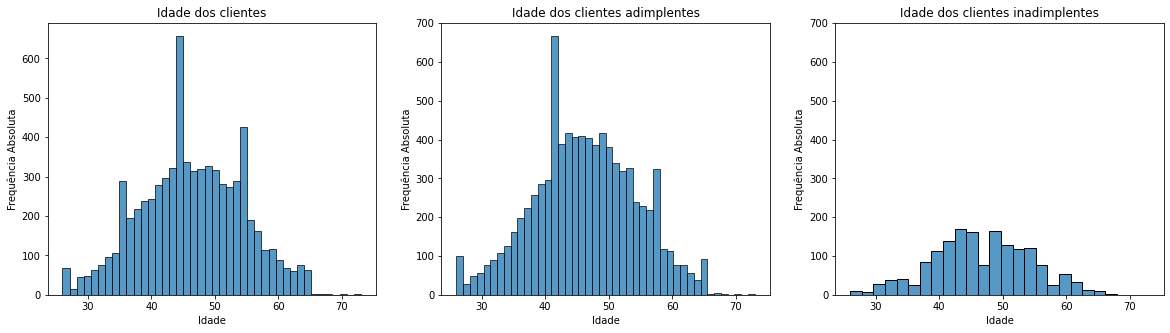

In [60]:
column = numericals[0]  # Idade
titles = 'Idade dos clientes', 'Idade dos clientes adimplentes', 'Idade dos clientes inadimplentes'

plot_numerical(column=column, titles=titles)

### Dependentes

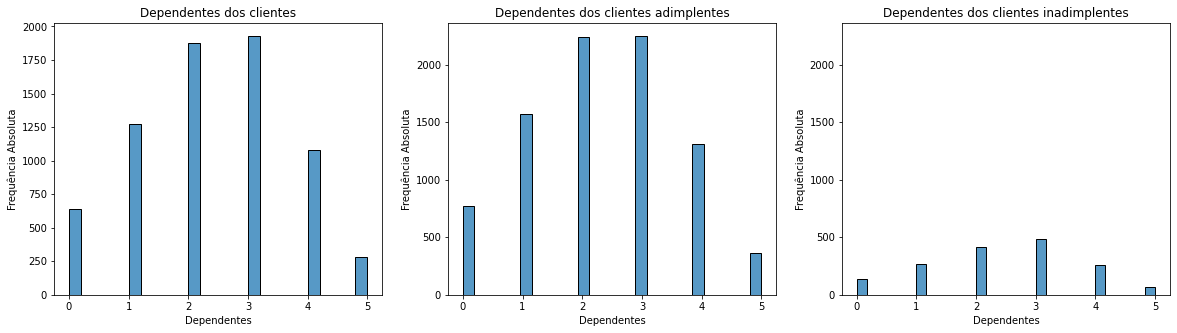

In [61]:
column = numericals[1]  # Dependentes
titles = 'Dependentes dos clientes', 'Dependentes dos clientes adimplentes', 'Dependentes dos clientes inadimplentes'

plot_numerical(column=column, titles=titles)

### Meses de relacionamento

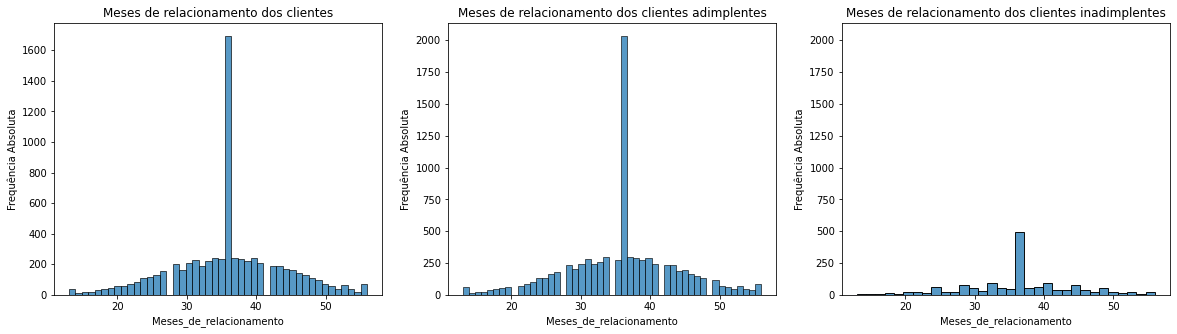

In [62]:
column = numericals[2]  # Meses de relacionamento
titles = 'Meses de relacionamento dos clientes', 'Meses de relacionamento dos clientes adimplentes', 'Meses de relacionamento dos clientes inadimplentes'

plot_numerical(column=column, titles=titles)

### Quantidade de produtos

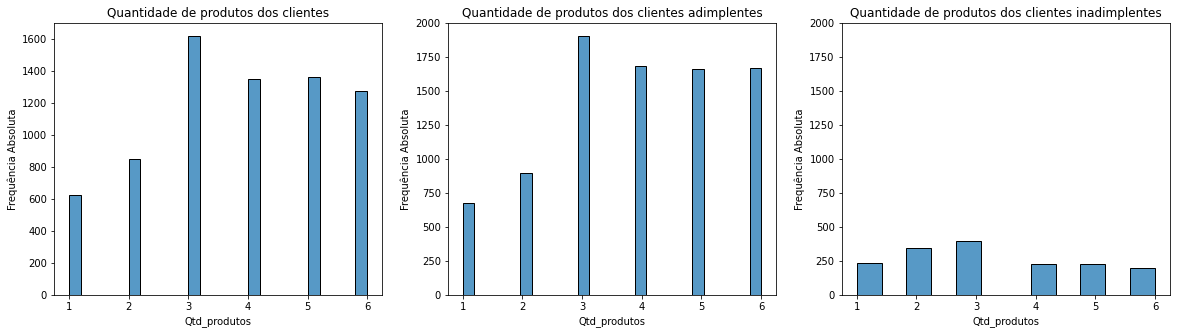

In [63]:
column = numericals[3]  # Quantidade de produtos
titles = 'Quantidade de produtos dos clientes', 'Quantidade de produtos dos clientes adimplentes', 'Quantidade de produtos dos clientes inadimplentes'

plot_numerical(column=column, titles=titles)

### Interações nos últimos 12 meses

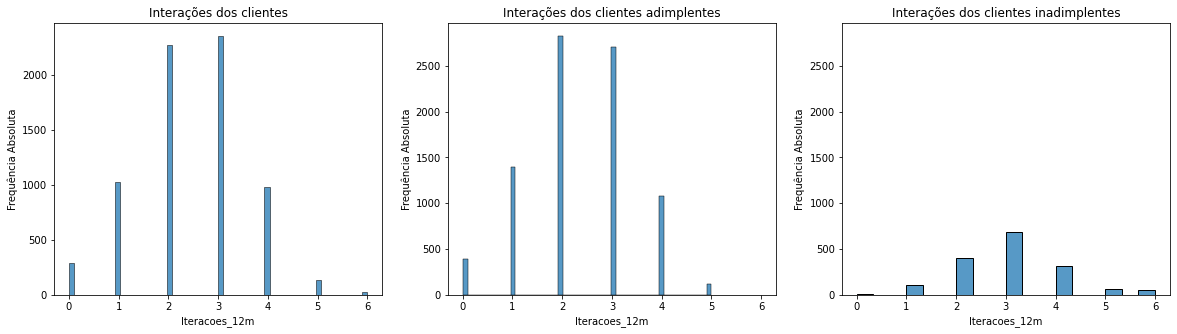

In [64]:
column = numericals[4]  # Interações nos últimos 12 meses
titles = 'Interações dos clientes', 'Interações dos clientes adimplentes', 'Interações dos clientes inadimplentes'

plot_numerical(column=column, titles=titles)

### Meses inativos dos últimos 12 meses

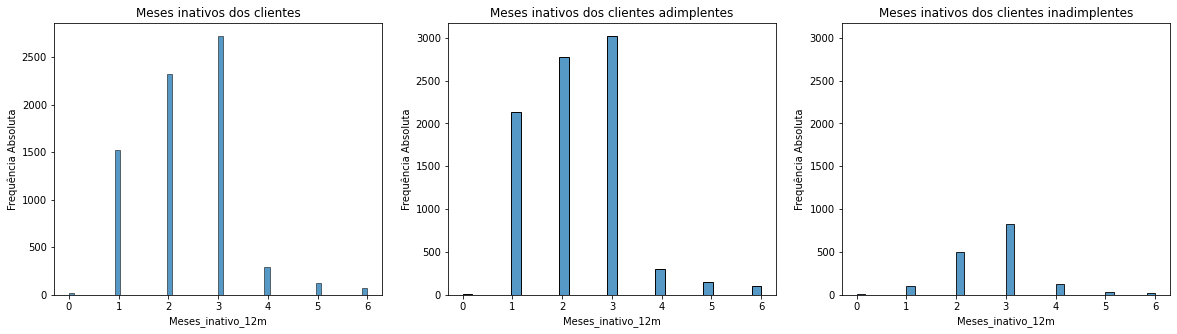

In [65]:
column = numericals[5]  # Meses inativos dos últimos 12 meses
titles = 'Meses inativos dos clientes', 'Meses inativos dos clientes adimplentes', 'Meses inativos dos clientes inadimplentes'

plot_numerical(column=column, titles=titles)

### Limite de crédito

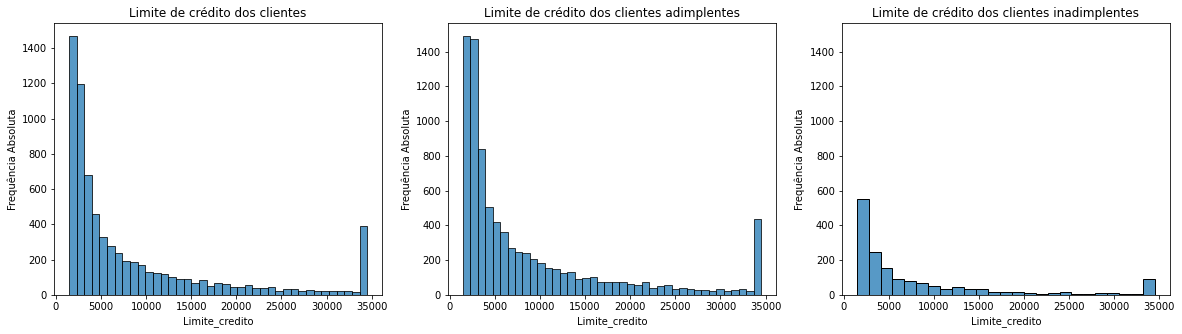

In [66]:
column = numericals[6]  # Limite de crédito
titles = 'Limite de crédito dos clientes', 'Limite de crédito dos clientes adimplentes', 'Limite de crédito dos clientes inadimplentes'

plot_numerical(column=column, titles=titles)

### Valor de transações dos últimos 12 meses

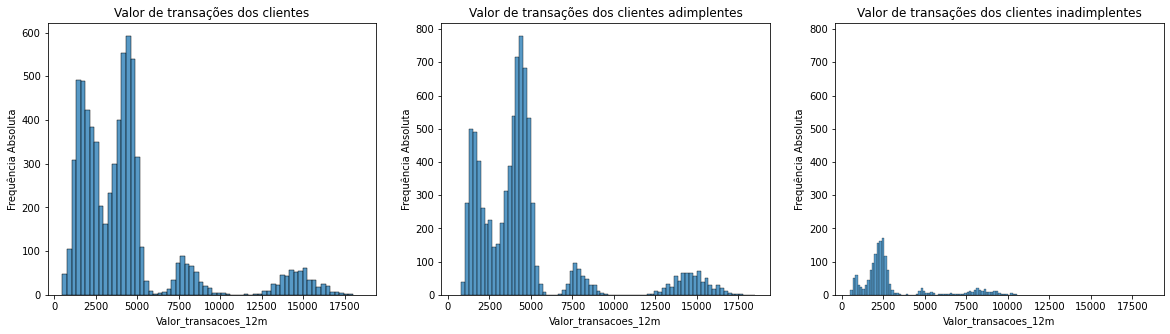

In [67]:
column = numericals[7]  # Valor de transações dos últimos 12 meses
titles = 'Valor de transações dos clientes', 'Valor de transações dos clientes adimplentes', 'Valor de transações dos clientes inadimplentes'

plot_numerical(column=column, titles=titles)

### Quantidade de transações nos últimos 12 meses

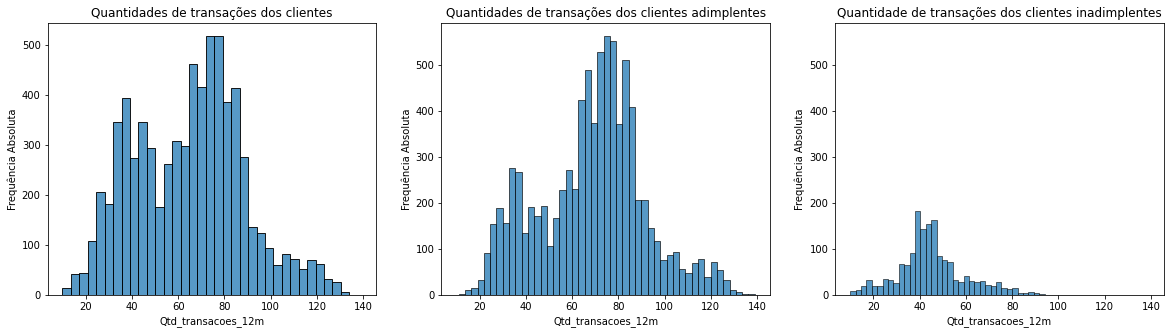

In [68]:
column = numericals[8]  # Quantidade de transações nos últimos 12 meses
titles = 'Quantidades de transações dos clientes', 'Quantidades de transações dos clientes adimplentes', 'Quantidade de transações dos clientes inadimplentes'

plot_numerical(column=column, titles=titles)

# Conclusão

Analisando os gráficos das variáveis categóricas, não há nenhuma diferença significativa entre os clientes adimplentes e inadimplentes. Isso significa que nenhuma dessas variáveis pode explicar a inadinplência dos clientes na nossa base de dados.

No caso dos gráficos das variáveis numéricas, podemos visualizar alterações significativas apenas nas variáveis de valor de transações e de quantidade de transações. Clientes considerados inadimplentes fazem menos transações no período de 1 ano, e o valor total dessas transações  é menor, quando comparadas às respectivas variáveis dos  clientes adimplentes.

Num período de 12 meses, clientes inadimplentes realizam entre 20 e 40 transaçõesmais frequentemente, raramente 80 e nunca 100 ou mais. Quanto ao valor total das transações, em 12 meses, clientes inadimplentes nunca transacionam entre 12500 e 17500.

Assim, podemos considerar que a quantidade de transações e o valor dessas transações são fatores fortemente correlacionados à ocorrência da inadimplência. Logo, é importante que sejam realizados estudos e acompanhamentos mais aprofundados, para avaliar se de fato esses fatores podem explicar a inadimplência. Caso positivo, é fundamental que essas variáveis sejam levadas em conta ao avaliar a possibilidade de concessão de crédito.